# TimeGPT

TimeGPT is a production-ready generative pretrained transformer for time series. It’s capable of accurately predicting various domains such as retail, electricity, finance, and IoT with just a few lines of code.

It is user-friendly and low-code. Users can simply upload their time series data and generate forecasts or detect anomalies with just a single line of code.

TimeGPT is the only out of-the-box foundation model for time series that can be used through our public APIs, through Azure Studio (comming soon) or on your own infrastructure.

Features and capabilities

- Zero-shot Inference: TimeGPT can generate forecasts and detect anomalies straight out of the box, requiring no prior training data. This allows for immediate deployment and quick insights from any time series data.

- Fine-tuning: Enhance TimeGPT’s capabilities by fine-tuning the model on your specific datasets, enabling the model to adapt to the nuances of your unique time series data and improving performance on tailored tasks.

- API Access: Integrate TimeGPT seamlessly into your applications via our robust API. Upcoming support for Azure Studio will provide even more flexible integration options. Alternatively, deploy TimeGPT on your own infrastructure to maintain full control over your data and workflows.

- Add Exogenous Variables: Incorporate additional variables that might influence your predictions to enhance forecast accuracy. (E.g. Special Dates, events or prices)

- Multiple Series Forecasting: Simultaneously forecast multiple time series data, optimizing workflows and resources.

- Custom Loss Function: Tailor the fine-tuning process with a custom loss function to meet specific performance metrics.

- Cross-validation: Implement out of the box cross-validation techniques to ensure model robustness and generalizability.

- Prediction Intervals: Provide intervals in your predictions to quantify uncertainty effectively.

- Irregular Timestamps: Handle data with irregular timestamps, accommodating non-uniform interval series without preprocessing.

- Anomaly Detection: Automatically detect anomalies in time series, and use exogenous features for enhanced performance.

Source:
https://docs.nixtla.io/docs/getting-started-about_timegpt

### Step 1: Create a TimeGPT account and generate your API key

- Go to dashboard.nixtla.io
- Sign in with Google, GitHub or your email
- Create your API key by going to ‘API Keys’ in the menu and clicking on ‘Create New API Key’
- Your new key will appear. Copy the API key using the button on the right.

## Step 2: Install Nixtla

In [1]:
pip install nixtla

  Using cached nixtla-0.5.2-py3-none-any.whl (73 kB)
  Using cached httpx-0.27.0-py3-none-any.whl (75 kB)
  Using cached utilsforecast-0.2.0-py3-none-any.whl (38 kB)
  Using cached httpcore-1.0.5-py3-none-any.whl (77 kB)

[notice] A new release of pip available: 22.3.1 -> 24.1.2
[notice] To update, run: pip3.11 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Step 3: Import the Nixtla TimeGPT client

In [2]:
from nixtla import NixtlaClient

You can instantiate the NixtlaClient class providing your authentication API key.

In [3]:
nixtla_client = NixtlaClient(
    api_key = 'nixtla-tok-jNt1fIlgsGeTI3nto5VlwxGMPezKso6HBT2JGFsX9uQFP9SSaEbjXlNOrvRkSu9knzRanQYCIdebAZrE'
)

Check your API key status with the validate_api_key method.

In [4]:
nixtla_client.validate_api_key()

INFO:nixtla.nixtla_client:Happy Forecasting! :), If you have questions or need support, please email ops@nixtla.io


True

## Step 4: Start making forecasts!

Sample date from Kaggle: https://www.kaggle.com/datasets/kandij/electric-production

In [5]:
import pandas as pd
df = pd.read_csv('Electric_Production.csv')
df.head()

,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151


In [9]:
df.tail()

,DATE,Value
392,09-01-2017,98.6154
393,10-01-2017,93.6137
394,11-01-2017,97.3359
395,12-01-2017,114.7212
396,01-01-2018,129.4048


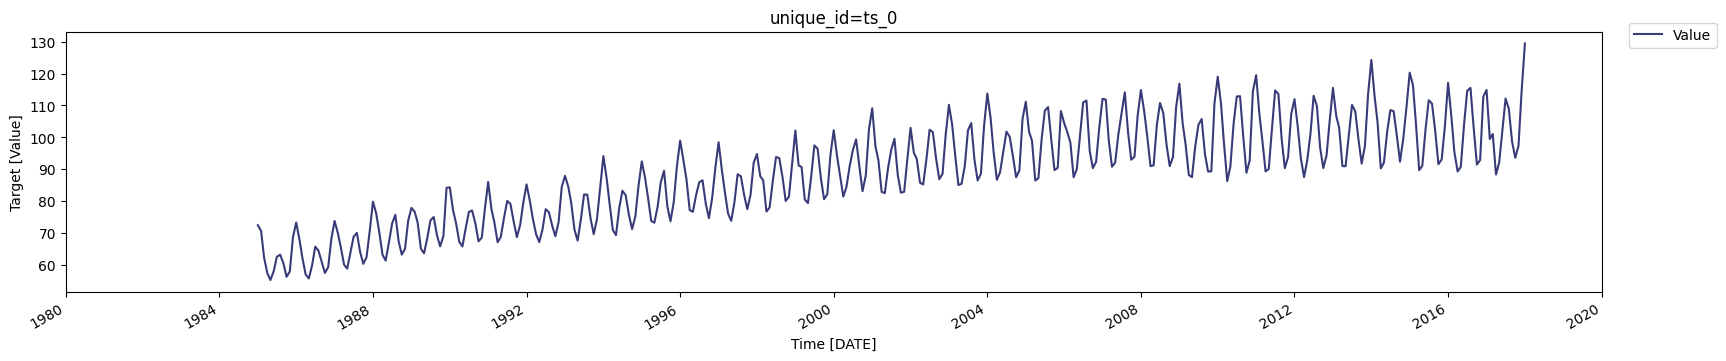

In [7]:
nixtla_client.plot(df, time_col='DATE', target_col='Value')

### Forecast a longer horizon into the future

Next, forecast the next 12 months using the SDK forecast method. Set the following parameters:

- df: A pandas DataFrame containing the time series data.
- h: Horizons is the number of steps ahead to forecast.
- freq: The frequency of the time series in Pandas format. See pandas’ available frequencies. (If you don’t provide any frequency, the SDK will try to infer it)
- time_col: The column that identifies the datestamp.
- target_col: The variable to forecast.

In [8]:
timegpt_fcst_df = nixtla_client.forecast(df=df, h=12, freq='MS', time_col='DATE', target_col='Value')
timegpt_fcst_df.head()

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


,DATE,TimeGPT
0,2018-02-01,114.532623
1,2018-03-01,105.138824
2,2018-04-01,92.440628
3,2018-05-01,93.647797
4,2018-06-01,107.498817


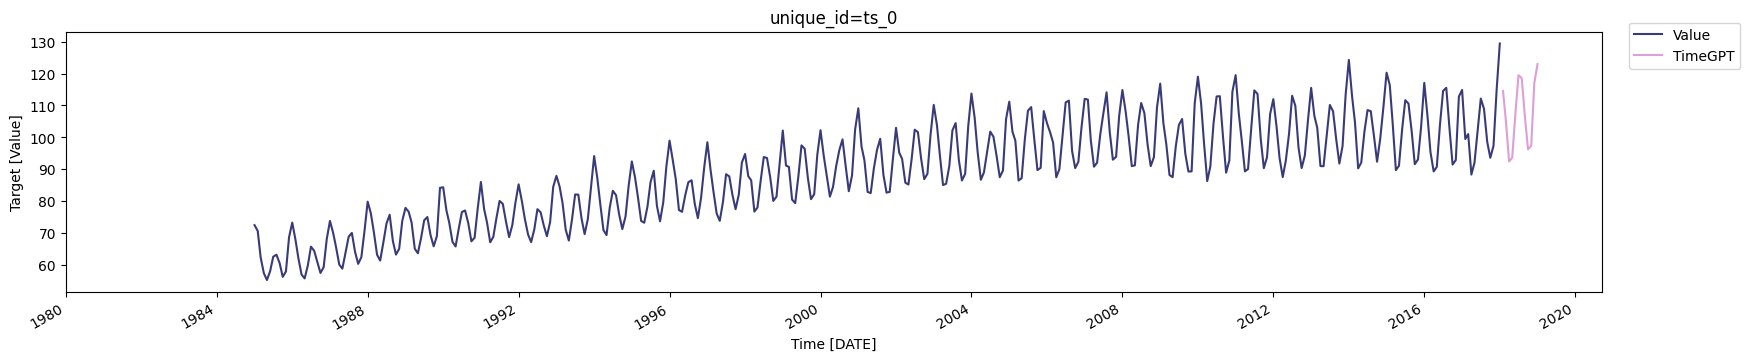

In [10]:
nixtla_client.plot(df, timegpt_fcst_df, time_col='DATE', target_col='Value')

You can also produce longer forecasts by increasing the horizon parameter and selecting the timegpt-1-long-horizon model. Use this model if you want to predict more than one seasonal period of your data.

For example, let’s forecast the next 36 months:

In [11]:
timegpt_fcst_df = nixtla_client.forecast(df=df, h=36, time_col='DATE', target_col='Value', freq='MS', model='timegpt-1-long-horizon')
timegpt_fcst_df.head()

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


,DATE,TimeGPT
0,2018-02-01,113.356407
1,2018-03-01,105.592247
2,2018-04-01,92.659416
3,2018-05-01,95.046135
4,2018-06-01,108.278755


### Produce a shorter forecast

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


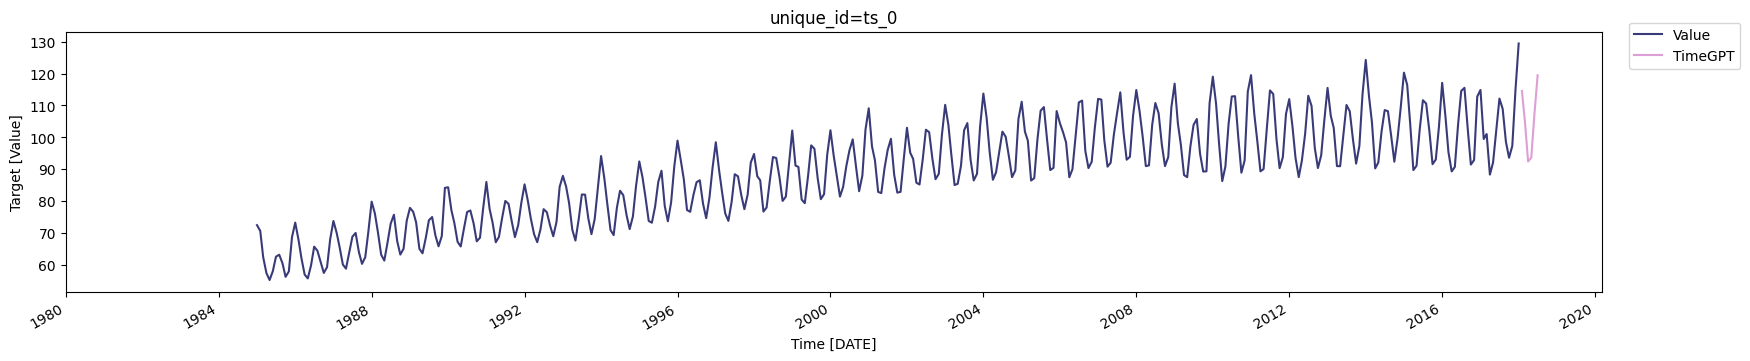

In [13]:
timegpt_fcst_df = nixtla_client.forecast(df=df, h=6, time_col='DATE', target_col='Value', freq='MS')
nixtla_client.plot(df, timegpt_fcst_df, time_col='DATE', target_col='Value')